In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text

# Load Dataset

In [44]:
df = pd.read_csv(r"..\data\holiday_interests_by_country_gender.csv")  

df = (

    # reshape the dataframe from wide to long format
    df.melt(
        id_vars=["gender", "address4"]      # columns to keep fixed (repeated for each row)
    )

    # rename columns for better readability and visualisation
    .rename(
        columns={
            "address4": "country",
            "variable": "holiday_interest",
            "value": "count"
        }
    )

    # optional: clean format of holiday interest names for display
    .assign(
        holiday_interest=lambda x: (
            x["holiday_interest"]
            .str.replace("_Sum", "", regex=False)
            .str.replace("_", " ", regex=False)
            .str.title()
        )
    )

    # group by holiday interest and sum the counts across all entries (analysis excludes gender and country)
    .groupby("holiday_interest")["count"].sum()
    
    # sort in descending order for display
    .sort_values(ascending=False).reset_index()
)

df

,holiday_interest,count
0,Scuba Diving,18964
1,Trail Walking,18853
2,Mountaineering,18837
3,Dancing,12761
4,Mountain Biking,12755
5,Sightseeing,12750
6,Hiking,12682
7,Skiing,6560
8,Climbing,6494
9,Snowboarding,6381


# Frequency Counts of Holiday Interests

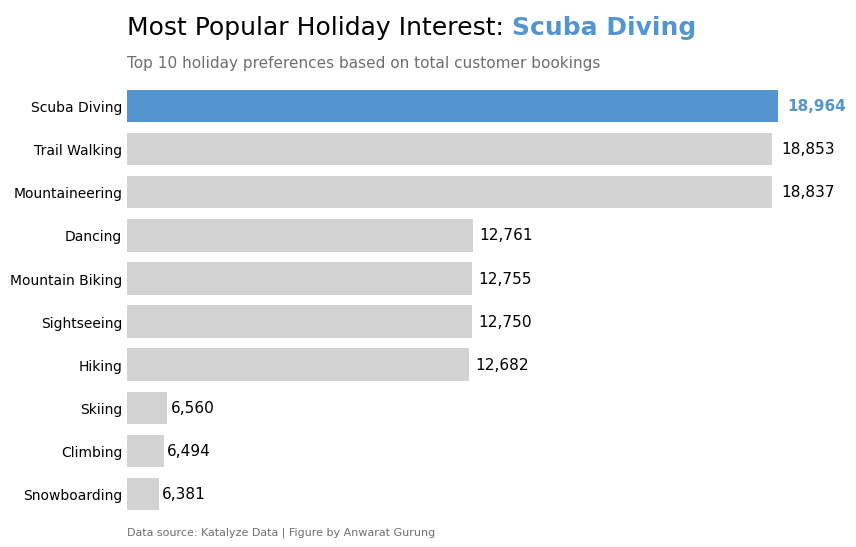

In [53]:
TOP_N = 10              # max 13 unique holiday interests in the dataset
TOP_K = 1               # no. of top interests to highlight in the visualisation (with a bolder colour)

df = df.head(TOP_N).sort_values(by="count")    # filter for the top N holiday interests

# choose a colour palette
cmap = load_cmap("Badlands")
colours = cmap.colors

# colour mapping for bars (highlight the top interest and grey out the rest)
highlight_interest = df.loc[df["count"].idxmax(), "holiday_interest"]       # find most popular holiday interset to highlight
highlight_colour = colours[0]                                               # pick highlight colour for most popular interest
colours_df = (df["holiday_interest"] == highlight_interest).map({
    True: highlight_colour,
    False: "lightgrey"
})

# create figure
fig, ax = plt.subplots(figsize=(9, 6))

# # axes customisation (remove spines and ticks)
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.tick_params(length=0)
ax.set_xticks([])

# plot horizontal bar chart
ax.barh(
    y=df["holiday_interest"],
    width=df["count"],
    color=colours_df,
    height=0.75
)

# optional: add left padding for visual gap
ax.set_xlim([df["count"].min() * 0.9, None])

# value annotations
for i in range(df.shape[0]):
    interest = df["holiday_interest"].iloc[i]
    value = df["count"].iloc[i]

    ax.text(
        x=value * 1.01,
        y=i,
        s=f"{value:,}",
        va="center",
        ha="left",
        weight="bold" if interest == highlight_interest else None,
        color=highlight_colour if interest == highlight_interest else "black",
        fontsize=11
    )

# set main title positioning
x_value, y_value = 0.125, 0.97
fig_text(
    x=x_value, y=y_value,
    s=f"Most Popular Holiday Interest: <{highlight_interest}>",     # chart title
    highlight_textprops=[
        {"color": highlight_colour, "weight": "bold"},
    ],
    fontsize=18
)

# chart subtitle
fig.text(
    x=x_value, y=y_value * 0.91,
    s=f"Top {TOP_N} holiday preferences based on total customer bookings",
    size=11,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value,
    0.1,
    "Data source: Katalyze Data | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=8,
    color="#6e6e6e",
)

plt.savefig("../images/holiday_interests_frequency_counts_bar_chart.png", dpi=200, bbox_inches="tight")

plt.show()